In [18]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
user_data = './dcai_gcb_00/dcai_gcb_00'
test_data = './label_book/label_book'
df = pd.read_csv('./predictions.csv')

In [8]:
valid = tf.keras.preprocessing.image_dataset_from_directory(
    user_data + '/val',
    labels="inferred",
    label_mode="categorical",
    class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
    shuffle=False,
    seed=123,
    batch_size=8,
    image_size=(32, 32),
)

test = tf.keras.preprocessing.image_dataset_from_directory(
    test_data,
    labels="inferred",
    label_mode="categorical",
    class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
    shuffle=False,
    seed=123,
    batch_size=8,
    image_size=(32, 32),
)

Found 1000 files belonging to 10 classes.
Found 52 files belonging to 10 classes.


In [9]:
images = list(valid.unbatch()) + list(test.unbatch())
file_paths = valid.file_paths + test.file_paths

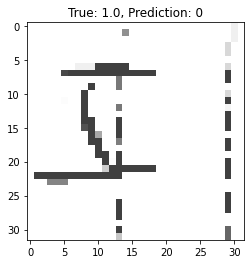

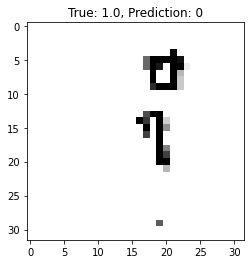

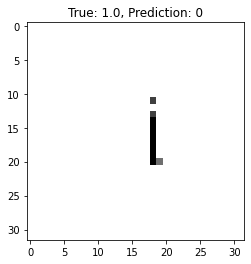

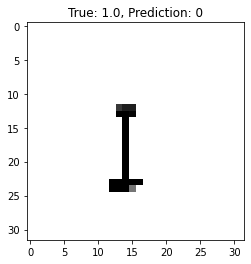

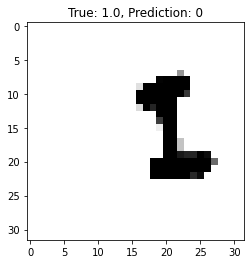

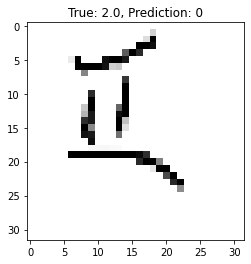

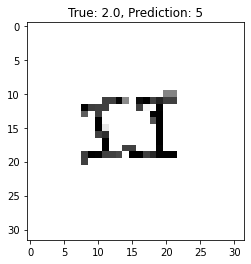

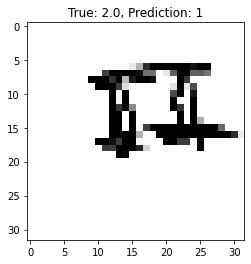

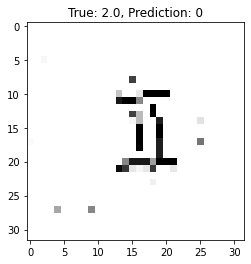

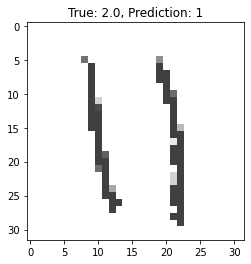

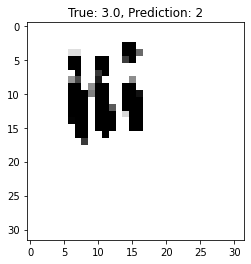

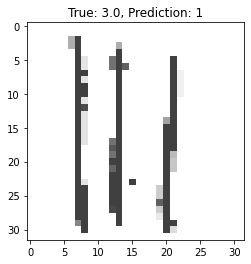

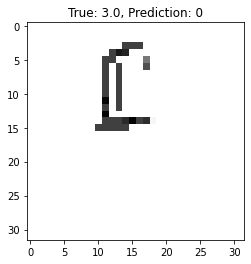

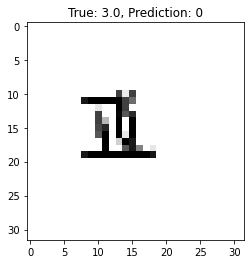

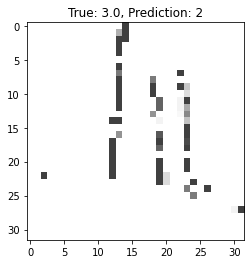

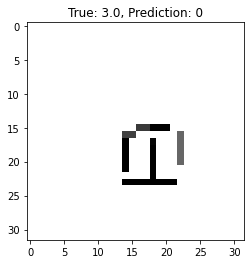

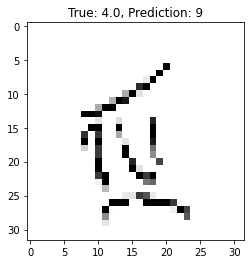

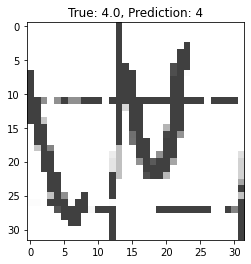

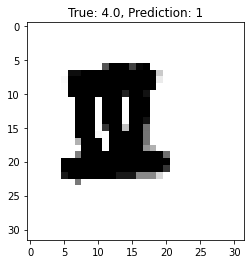

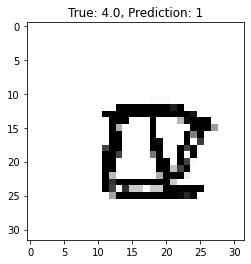

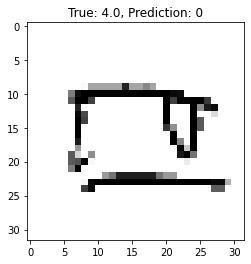

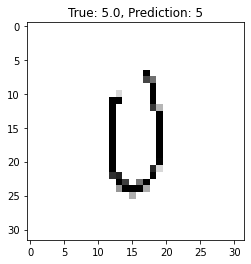

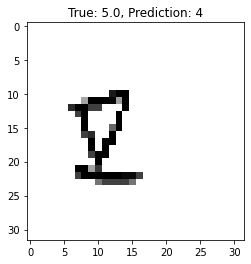

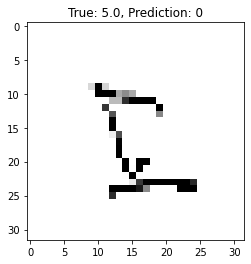

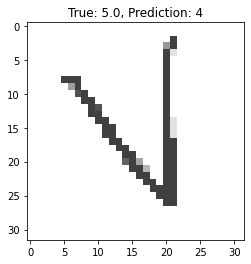

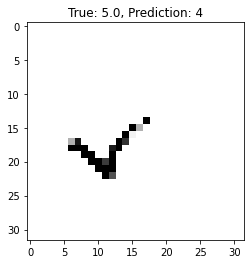

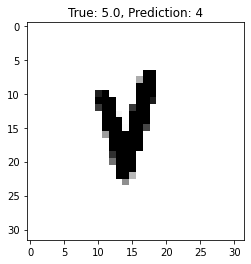

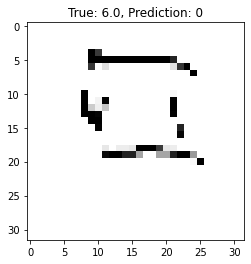

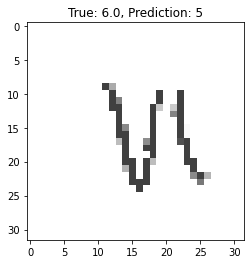

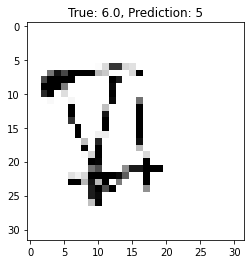

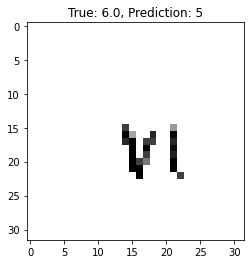

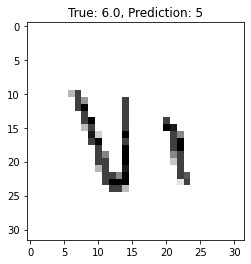

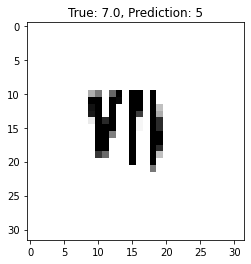

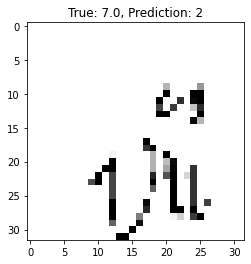

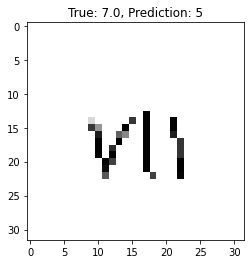

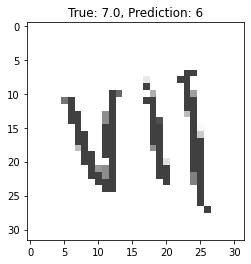

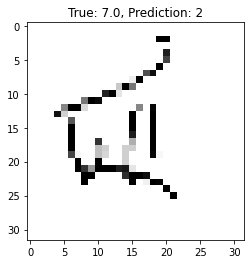

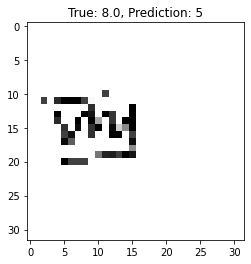

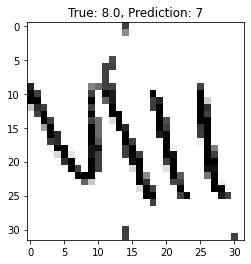

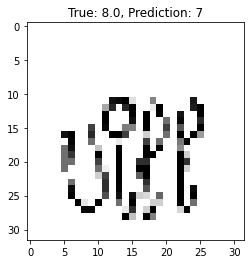

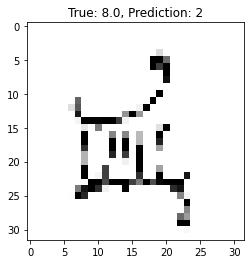

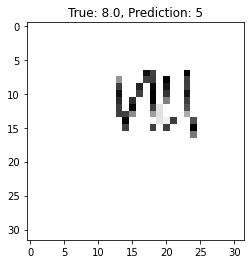

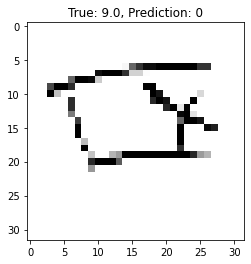

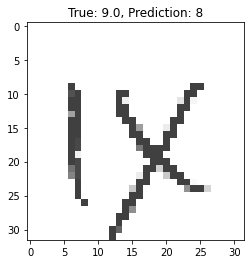

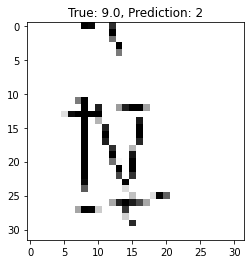

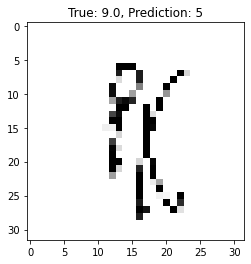

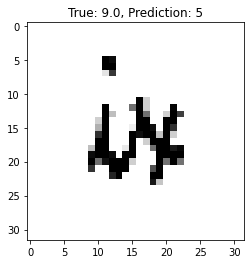

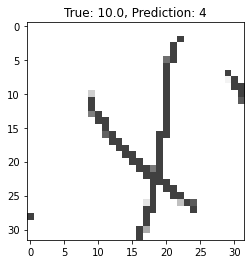

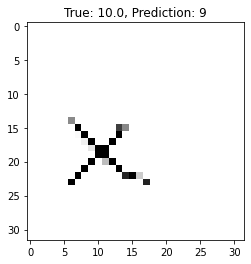

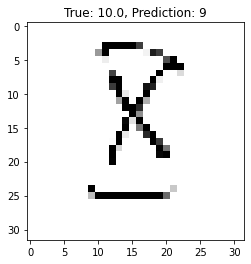

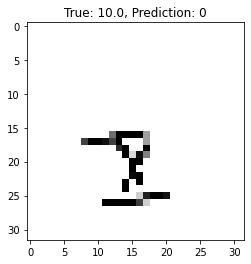

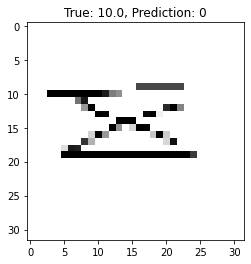

In [19]:
for _, row in df.iterrows():
    fp = './' + row['fp']
    i = file_paths.index(fp)
    image = images[i][0].numpy().astype(np.uint8)
    plt.imshow(image)
    plt.title('True: {}, Prediction: {}'.format(row['truth'], row['prediction']))
    plt.show()
    plt.close()